[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noski\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\noski\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


SpaCy Pipeline Components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Starting multi-edge benchmarking process...
Successfully connected to Neo4j.
Fetching all models from Neo4j...
Fetched 991 models from Neo4j.
Selecting 100 target models for benchmarking...
Selected 100 target models.
Loading SentenceTransformer model...


C:\Users\noski\PycharmProjects\Semantic_Search_Thingiverse\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


SentenceTransformer model loaded.

Processing similarity category: SIMILAR_SUMMARIES_AI with description field: description_ai
Edge Type: SIMILAR_SUMMARIES_AI | Total Models: 539
Starting benchmarking of similarity thresholds...


Evaluating Thresholds: 100%|██████████| 101/101 [02:13<00:00,  1.32s/it]

Benchmarking complete.
Benchmarking metrics saved to 'benchmark_performance_metrics_SIMILAR_SUMMARIES_AI.csv'.
Plotting performance metrics for edge type: SIMILAR_SUMMARIES_AI


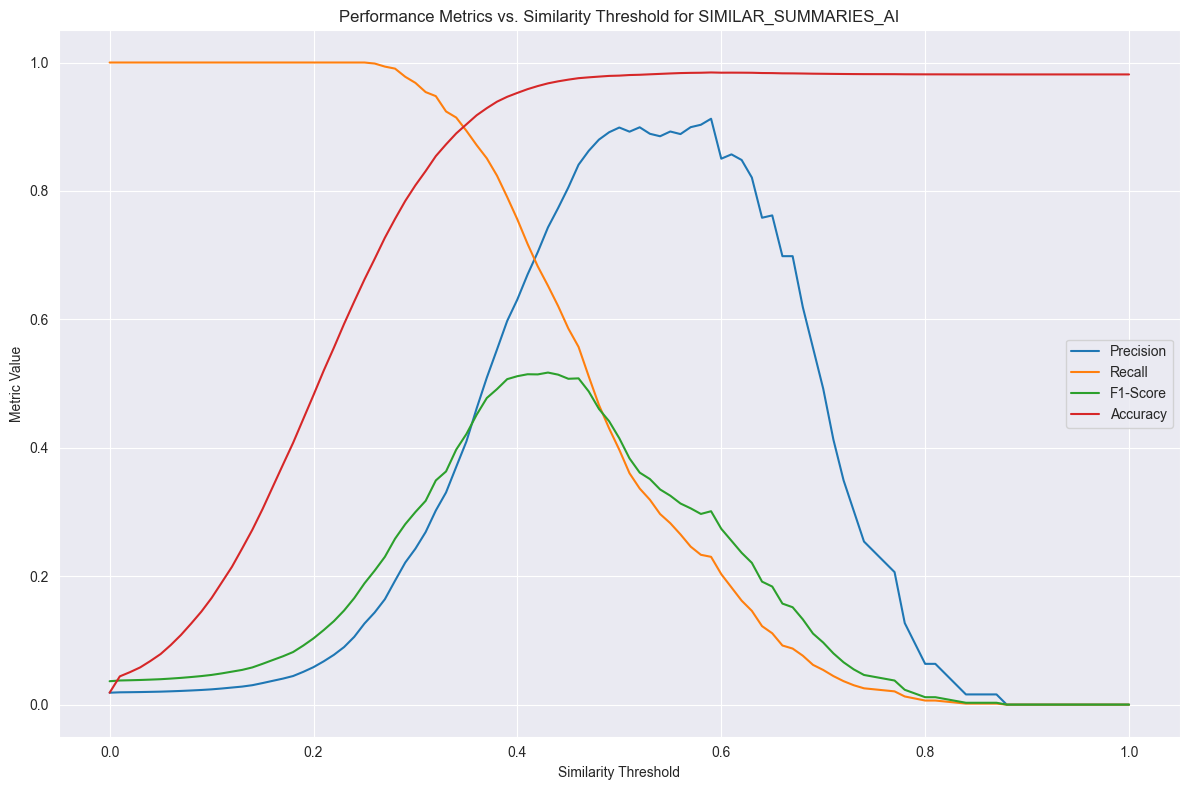

Displayed performance metrics plot for 'SIMILAR_SUMMARIES_AI'.
Optimal Threshold for SIMILAR_SUMMARIES_AI: 0.4300

Processing similarity category: SIMILAR_SUMMARIES_NONAI with description field: description_nonai
Edge Type: SIMILAR_SUMMARIES_NONAI | Total Models: 452
Starting benchmarking of similarity thresholds...


Evaluating Thresholds: 100%|██████████| 101/101 [03:47<00:00,  2.25s/it]


Benchmarking complete.
Benchmarking metrics saved to 'benchmark_performance_metrics_SIMILAR_SUMMARIES_NONAI.csv'.
Plotting performance metrics for edge type: SIMILAR_SUMMARIES_NONAI


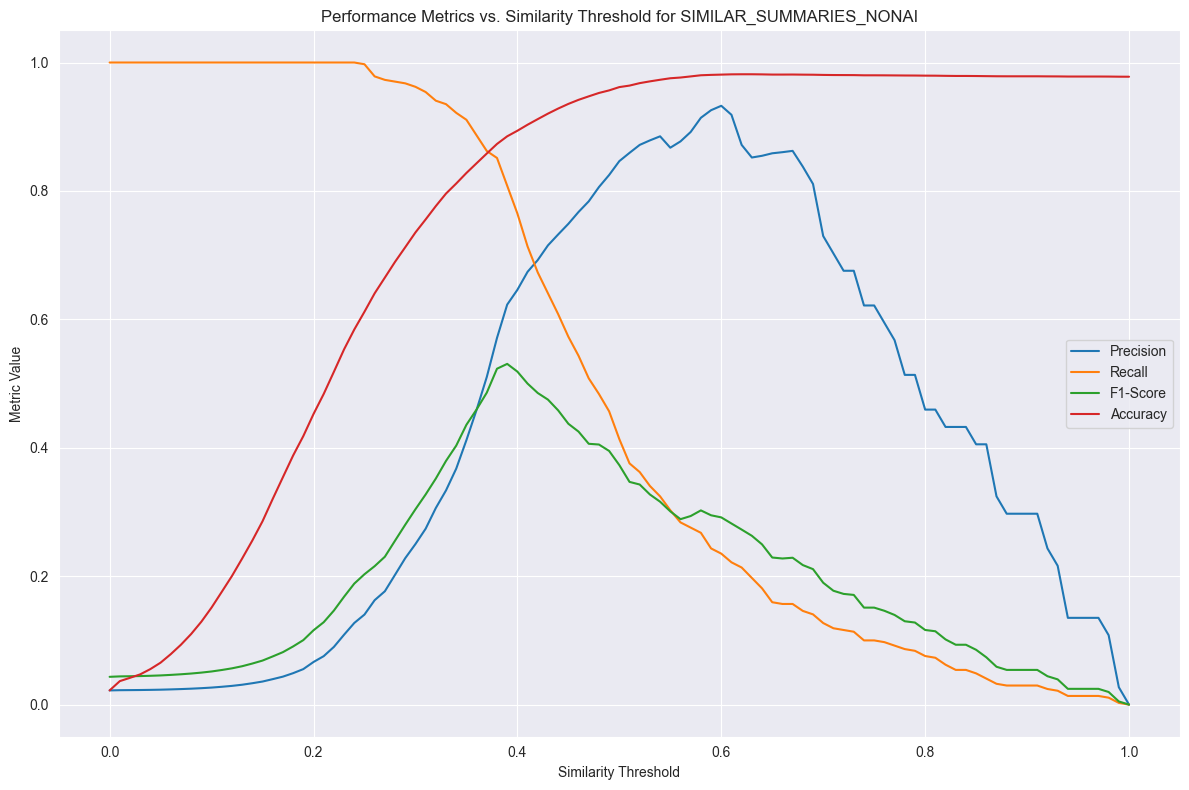

Displayed performance metrics plot for 'SIMILAR_SUMMARIES_NONAI'.
Optimal Threshold for SIMILAR_SUMMARIES_NONAI: 0.3900

Processing similarity category: SIMILAR_TAGS_AI with description field: tags_ai
Edge Type: SIMILAR_TAGS_AI | Total Models: 539
Starting benchmarking of similarity thresholds...


Evaluating Thresholds: 100%|██████████| 101/101 [02:49<00:00,  1.68s/it]

Benchmarking complete.
Benchmarking metrics saved to 'benchmark_performance_metrics_SIMILAR_TAGS_AI.csv'.
Plotting performance metrics for edge type: SIMILAR_TAGS_AI


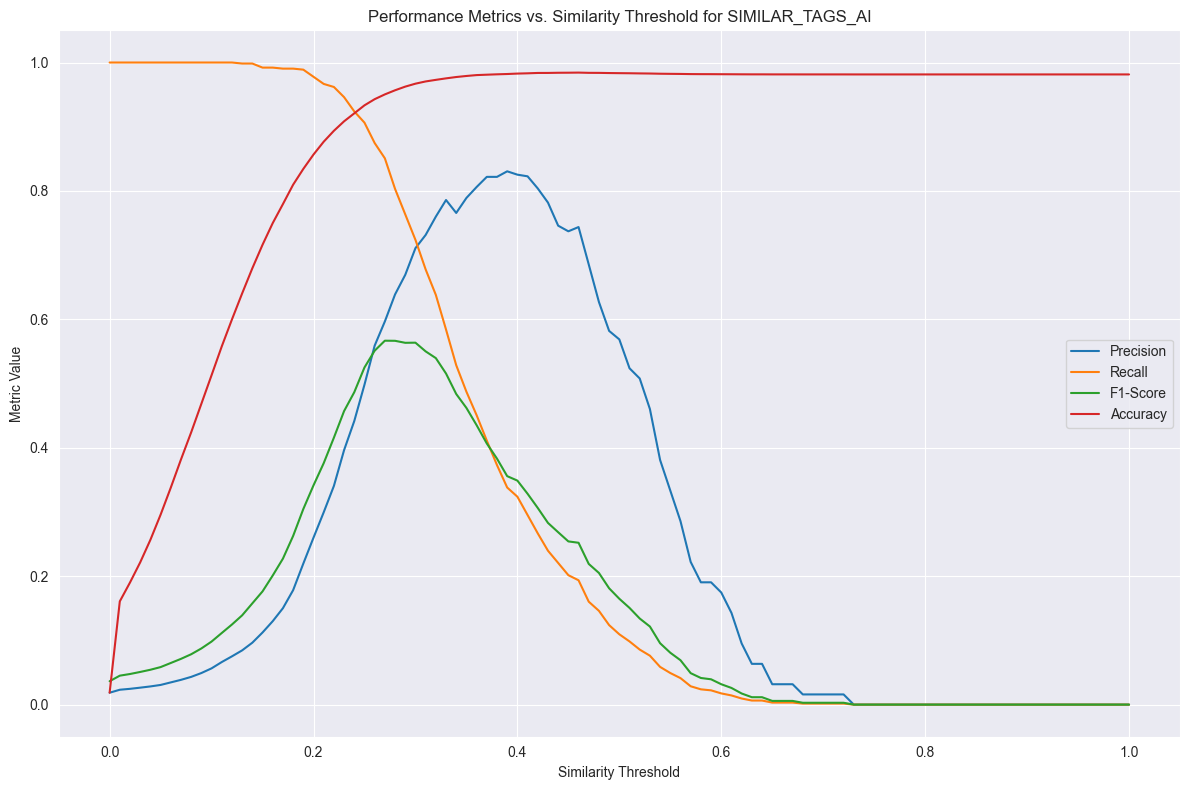

Displayed performance metrics plot for 'SIMILAR_TAGS_AI'.
Optimal Threshold for SIMILAR_TAGS_AI: 0.2700

Processing similarity category: SIMILAR_TAGS_NONAI with description field: tags_nonai
Edge Type: SIMILAR_TAGS_NONAI | Total Models: 418
Starting benchmarking of similarity thresholds...


Evaluating Thresholds: 100%|██████████| 101/101 [01:52<00:00,  1.11s/it]

Benchmarking complete.
Benchmarking metrics saved to 'benchmark_performance_metrics_SIMILAR_TAGS_NONAI.csv'.
Plotting performance metrics for edge type: SIMILAR_TAGS_NONAI


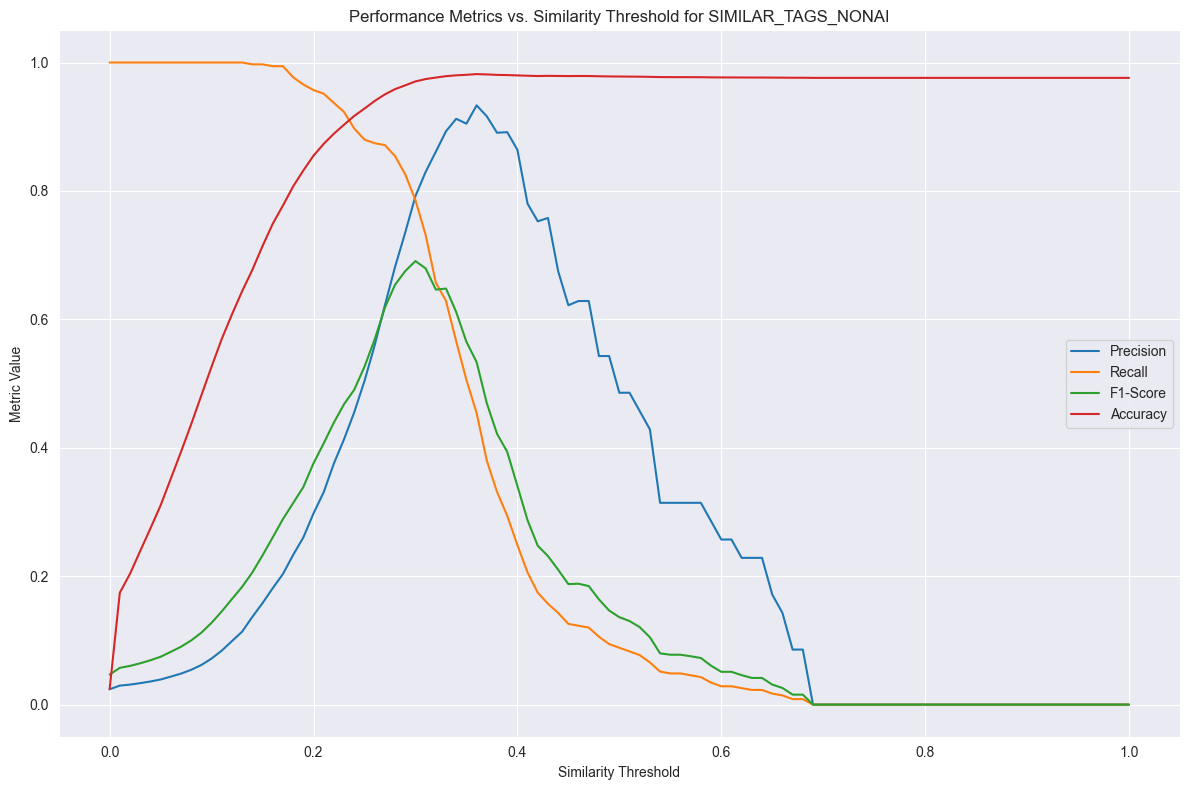

Displayed performance metrics plot for 'SIMILAR_TAGS_NONAI'.
Optimal Threshold for SIMILAR_TAGS_NONAI: 0.3000

Processing similarity category: SIMILAR_NAMES with description field: name
Edge Type: SIMILAR_NAMES | Total Models: 984
Starting benchmarking of similarity thresholds...


Evaluating Thresholds: 100%|██████████| 101/101 [02:52<00:00,  1.70s/it]


Benchmarking complete.
Benchmarking metrics saved to 'benchmark_performance_metrics_SIMILAR_NAMES.csv'.
Plotting performance metrics for edge type: SIMILAR_NAMES


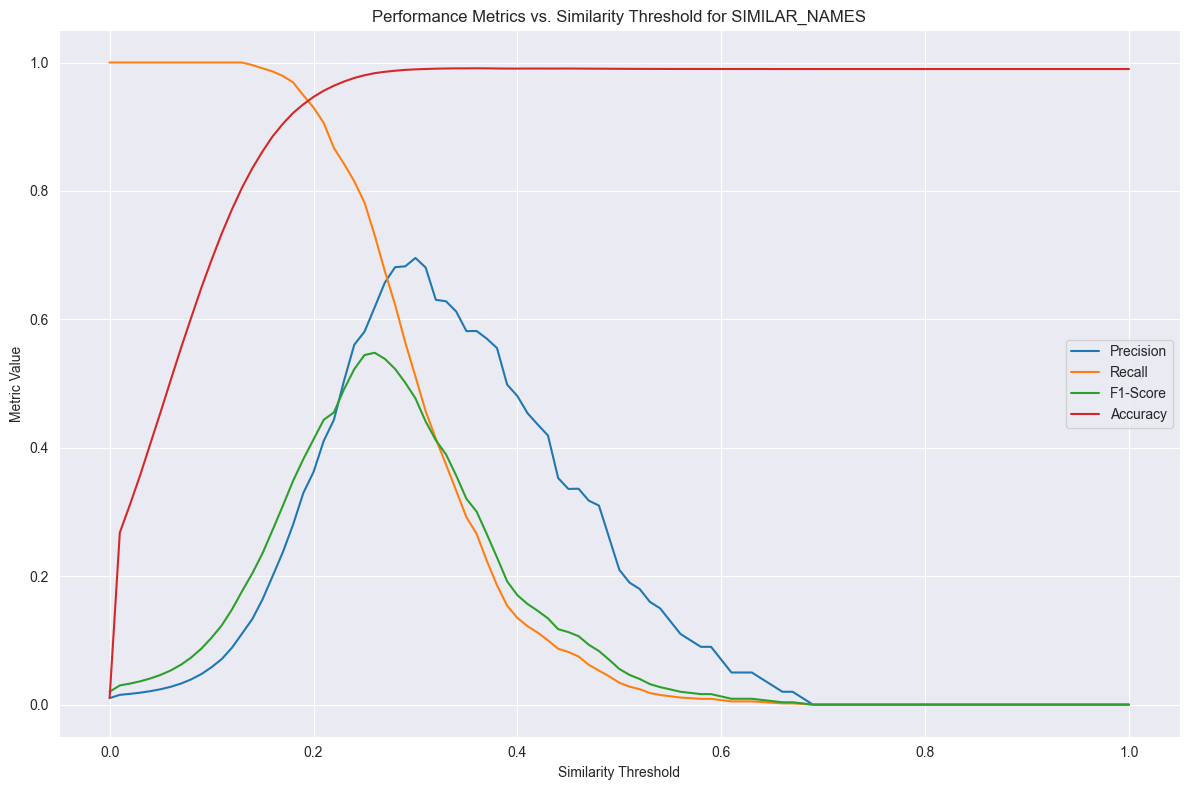

Displayed performance metrics plot for 'SIMILAR_NAMES'.
Optimal Threshold for SIMILAR_NAMES: 0.2600
Optimal thresholds for all edge types saved to 'optimal_thresholds_per_edge_type.csv'.

Multi-edge benchmarking process complete.


In [6]:
# def main():
#     """
#     Main function to orchestrate the benchmarking process for multiple similarity edge types.
#     """
#     print("Starting multi-edge benchmarking process...")
# 
#     graph_db = connect_to_neo4j(NEO4J_URI, NEO4J_USER, NEO4J_PASSWORD)
# 
#     df = fetch_all_models(graph_db, node_label="Model")
# 
#     num_target_models = 100 
#     target_models = select_target_models(df, num_targets=num_target_models)
# 
#     print("Loading SentenceTransformer model...")
#     model = SentenceTransformer('all-MiniLM-L6-v2')
#     print("SentenceTransformer model loaded.")
# 
#     similarity_edge_types = {
#         'SIMILAR_SUMMARIES_AI': 'description_ai',
#         'SIMILAR_SUMMARIES_NONAI': 'description_nonai',
#         'SIMILAR_TAGS_AI': 'tags_ai',
#         'SIMILAR_TAGS_NONAI': 'tags_nonai',
#         'SIMILAR_NAMES': 'name'
#     }
# 
#     top_k = 10
# 
#     similarity_thresholds = np.linspace(0, 1, 101) 
# 
#     all_metrics = {}
#     optimal_thresholds = {}
# 
#     for edge_type, description_field in similarity_edge_types.items():
#         print(f"\nProcessing similarity category: {edge_type} with description field: {description_field}")
# 
#         relevant_df = df[df[description_field].notna() & (df[description_field].str.strip() != '')].reset_index(drop=True)
#         num_relevant = relevant_df.shape[0]
#         if num_relevant == 0:
#             print(f"No relevant models found for edge type: {edge_type}. Skipping...")
#             continue
# 
#         print(f"Edge Type: {edge_type} | Total Models: {num_relevant}")
# 
#         target_models['description_field'] = description_field
# 
#         metrics_df = benchmark_similarity_thresholds(
#             df=relevant_df,
#             target_models=target_models,
#             model=model,
#             top_k=top_k,
#             thresholds=similarity_thresholds
#         )
# 
#         csv_filename = f"benchmark_performance_metrics_{edge_type}.csv"
#         metrics_df.to_csv(csv_filename, index=False)
#         print(f"Benchmarking metrics saved to '{csv_filename}'.")
# 
#         plot_performance_metrics(metrics_df, edge_type)
# 
#         all_metrics[edge_type] = metrics_df
# 
#         if not metrics_df.empty:
#             optimal_row = metrics_df.loc[metrics_df['F1-Score'].idxmax()]
#             optimal_threshold = optimal_row['Threshold']
#             optimal_thresholds[edge_type] = optimal_threshold
#             print(f"Optimal Threshold for {edge_type}: {optimal_threshold:.4f}")
#         else:
#             optimal_thresholds[edge_type] = None
#             print(f"No metrics available to determine optimal threshold for {edge_type}.")
# 
#     optimal_thresholds_df = pd.DataFrame(list(optimal_thresholds.items()), columns=['Edge_Type', 'Optimal_Threshold'])
#     optimal_thresholds_df.to_csv("optimal_thresholds_per_edge_type.csv", index=False)
#     print("Optimal thresholds for all edge types saved to 'optimal_thresholds_per_edge_type.csv'.")
# 
#     print("\nMulti-edge benchmarking process complete.")
# 
# if __name__ == "__main__":
#     main()


Comparison Across Edge Types

SIMILAR_SUMMARIES_AI vs. SIMILAR_TAGS_AI:
Threshold: 0.43 vs. 0.27
Implication: AI-generated summaries are more robust and discriminative compared to AI-generated tags. The system requires higher similarity for summaries to consider them relevant but is more lenient with tags.

AI vs. Non-AI (e.g., SIMILAR_SUMMARIES_AI vs. SIMILAR_SUMMARIES_NONAI):
Threshold: 0.43 vs. 0.39
Implication: AI-generated summaries are slightly more discriminative than user-authored summaries, suggesting that AI can create semantically meaningful representations for retrieval.

SIMILAR_NAMES (Threshold = 0.26):
Implication: Names are the least discriminative feature among the edge types. A low threshold indicates that naming conventions across models may overlap significantly, requiring less strict matching criteria.